# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Цель исследования — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


## Изучение данных из файла

In [88]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.info()
df.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

1.first_day_exposition object - должен быть тип datetime
2.ceiling_height - пропущенные значения
3.floors_total - должен быть тип int, т.к. количество этажей - целое значение 
4.is_apartment - должен быть тип bool + пропущенные значения
5.living_area - есть пропущенные значения
6.kitchen_area - пропущенные значения
7.balcony - пропущенные значения
8.locality_name - пропущенные значения
9.airports_nearest - пропущенные значения
10.cityCenters_nearest - пропущенные значения
11.parks_around3000 - тип должен быть int + нулевые значения
12.parks_nearest - пропущенные значения
13.ponds_around3000 - тип должен быть int + пропущенные значения
14.ponds_nearest - пропущенные значения
15.days_exposition - тип должен быть int + пропущенные значения

## Предобработка данных

In [89]:
#посмотрим значения в столбцах для выявления нестандартных значений  и ошибок
print(df.columns)
df['days_exposition'].value_counts()
df['total_images'].value_counts()
df['ceiling_height'].value_counts()
df['floor'].value_counts()
df['is_apartment'].value_counts()
df['total_area'].value_counts()
df['rooms'].value_counts()
df['airports_nearest'].value_counts()
df['cityCenters_nearest'].value_counts()
df['parks_around3000'].value_counts()
df['parks_nearest'].value_counts()
df['ponds_around3000'].value_counts()


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [90]:
#заменим пропуски в days_exposition и заменим тип данных
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [91]:
df['locality_name'].value_counts()

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок станции Корнево        1
село Никольское                1
деревня Пельгора               1
поселок Коробицыно             1
посёлок Дзержинского           1
Name: locality_name, Length: 364, dtype: int64

In [92]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано в таблице
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')


In [93]:
#заменим пропуски в balcony на 0 и изменим тип данных на int.Скорее всего пользователи просто не указали что балкона нет.
df['balcony'].value_counts()
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

In [94]:
#столбец апартаменты вероятно появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
df['is_apartment'] = df['is_apartment'].fillna(False)

In [95]:
#изменим цену на тип int для удобства просмотра
df['last_price'] = df['last_price'].astype('int')
df['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [96]:
#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


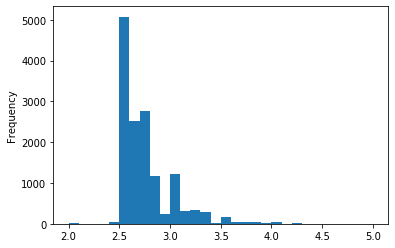

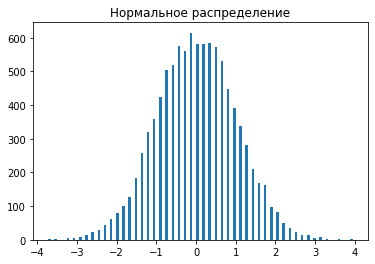

In [97]:
#посмотрим параметр ceiling_height, видим что есть необоснованно большие значения 
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
import numpy as np
import matplotlib.pyplot as plt
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
df['ceiling_height'].value_counts()
df['ceiling_height'].describe()
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)
df = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots()

ax.hist(df, bins = 50, rwidth = 0.4)

ax.set_title('Нормальное распределение')

plt.show()

In [ ]:
df['locality_name'].value_counts()
df['locality_name'].describe()
df['locality_name'] = df['locality_name'].str.lower()
df.drop_duplicates().reset_index(drop = True)

In [ ]:
df.head(15)

## Расчёты и добавление результатов в таблицу

In [ ]:
#для удобства просмотра приведем к типу int
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

In [ ]:
#создаю столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [ ]:
#создаю столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

In [ ]:
#создаю столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

In [ ]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [ ]:
#добавим столбец соотношения жилой плозади к общей
df['useful_area_ratio'] = df['living_area'] / df['total_area']

In [ ]:
#добавим столбец отношения площади кухни к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

In [ ]:
#изучим площадь
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
df['total_area'].describe()

In [ ]:
#изучим цену

df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
df['last_price'].describe()

In [ ]:

#изучим число комнат
df.plot(y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (5,5))
df['rooms'].describe()

In [ ]:
#изучим высоту потолков

df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (3,5), grid=True, figsize = (6,4))
df['ceiling_height'].describe()

Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. 

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

Во всех данных есть странные или пропущенные  значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12 тыс рублей. О качестве выборки значений нужно узнать  у сотрудника, который делал выборку данных, значения "странные" убирать не станем, что бы это не повлияло на исследование.


In [ ]:
print(df.columns)

In [ ]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
df['days_exposition'].describe()
df[df['days_exposition']!=0]['days_exposition'].value_counts()

Среднее значение - 180 дней, а медиана - 74 дня. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом. Есть аномалии на 45, 60, 7, 30, 90 днях это наиболее популярное количество дней до снятия объявления.



In [ ]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')


In [ ]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 40, grid = True, range = (1,1500))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))


In [ ]:
good_data['days_exposition'].value_counts()


In [ ]:
good_data['days_exposition'].describe()

Вывод: В очищенных данных с аномалиями в значениях меньших медианы получаем бОльшие значения медианы и среднего значения - 114 и 195 соответственно, вместо 74 и 180.

In [ ]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square_meter'])

Вывод: видим, что зависимость очень слабая - согласно корреляции = 0.3! Чем больше площадь тем  выше стоимость

In [ ]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median', style = 'o')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square_meter'])

#чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.

In [ ]:
pivot_table_floor_category = df.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category
#зависимость цены квадратного метра от этажа

In [ ]:
#зависимость цены квадратного метра удалённости от центра
df.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

df['cityCenters_nearest'].corr(df['price_per_square_meter'])


In [ ]:
#Чем ближе к центру, тем выше стоимость

In [ ]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Вывод: чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно, по субботам стоимость самая низкая.


In [ ]:
#зависимость цены квадратного метра от даты размещения: месяца.

pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Вывод:самая высокая стоимость метра в апреле и августе.Самая низкая стоимость в мае и июне. Возможно это может быть связано сс сезоном отпусков.

In [ ]:
#зависимость цены квадратного метра от даты размещения: года

#pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
#pivot_table_year_exposition.columns = ['mean', 'count', 'median']
#pivot_table_year_exposition.plot(y = 'median')

#pivot_table_month_exposition.sort_values('median', ascending = False)
import seaborn as sns

sns.pairplot(df[['last_price', 'price_per_square_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr())



Вывод: с 2014 до 2016 года цена падала, но далее начала увеличиваться

In [ ]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

Вывод: Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

In [ ]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Вывод:судя по графику центром считать будем радиус в 3-4 километра

In [ ]:
#выделим квартиры в центре, беря за радиус 3 км
center_spb_df = df.query('cityCenters_nearest_km <= 5 and locality_name == "Санкт-Петербург"')

In [ ]:
#Зависимость стоимости квадратного метра от количества комнат.

center_spb_rooms = center_spb_df.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_df['rooms'].corr(center_spb_df['price_per_square_meter'])

Вывод: в центре СПБ чем меньше комнат тем дороже стоимость метра квадратного, что конечно немного не логично.

Вывод: Квартиры на первом этаже в среднем дешевле, чем на последнем

In [ ]:
#Зависимость стоимости квадратного метра от удаленности от центра.

center_spb_df.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_df['cityCenters_nearest'].corr(center_spb_df['price_per_square_meter'])


Вывод: зависимости нет

In [ ]:
#Зависимость стоимости квадратного метра от дня недели размещения объявления.

center_spb_weekday_exposition = center_spb_df.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

Вывод: Минимальные средние цены в четверг и воскресенье, самые высокие  в понедельник и субботу. 

In [ ]:
#Зависимость стоимости квадратного метра от месяца размещения объявления.

center_spb_weekday_exposition = center_spb_df.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

Вывод:Cамая высокая стоимость метра в апреле и август а самая низкая стоимость в мае и июне

In [ ]:
 #Звисимость стоимости квадратного метра от года размещения объявления.

center_spb_year_exposition = center_spb_df.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

Вывод: цены в центре d  2016-2017 годах не падали, а планомерно расли

Общий вывод: Мы обработали полученный архив данных, обработали пропущенные значения там, где это необходимо, заменили типы данных для удобной работы. Добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили  параметры на наличие выбивающихся значений таких как: площадь, цена, число комнат, высота потолков.На стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.В 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено.Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 5 километров.
